In [ ]:
# Run this block before anything else

!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np
import scipy.io.netcdf as sp

import netCDF4 as nc

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cf           # for features
import cartopy.io.shapereader as shapereader
from cartopy.util import add_cyclic_point
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade

from google.colab import drive
drive.mount('/content/drive')

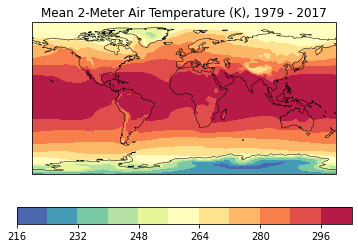

In [ ]:
# This script creates a global contour map of the mean air temperature values at each location

# Open the dataset file
f = nc.Dataset('/content/drive/Shared drives/Research Project Data/CSATS/t2m.daily_mean.1979-2017.nc', 'r')

# Make variables to store all the temperature, latitude, and longitude values
temp = f.variables['t2m'][:]
lat = f.variables['latitude'][:]
lon = f.variables['longitude'][:]

# Average the data at each location across all months. Fix problem with 0 longitude missing data
means = temp.mean(axis=0)
means, lon = add_cyclic_point(means, coord=lon)

# Set up a global map using the Plate Carree projection and add coastlines
axes = plt.axes(projection=ccrs.PlateCarree())
axes.add_feature(cf.COASTLINE, linewidth=0.5)

# Overlay the contours onto the map based on the mean temperature values at each location. Include a color bar and add a title
plt.contourf(lon[:], lat[:], means[:,:], levels=12, cmap='Spectral_r')
plt.colorbar(orientation='horizontal')
plt.title('Mean 2-Meter Air Temperature (K), 1979 - 2017')

# Save a PNG image of the map
plt.savefig('/content/drive/My Drive/Research Project for CSATS/AirTemp_Map.png', bbox_inches='tight', dpi=200)